# 분류 평가 지표

## MNIST Dataset

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

### 데이터 가져오기

In [2]:
mnist = fetch_openml("mnist_784", version=1, as_frame=False)

### 데이터 탐색하기

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [27]:
X = mnist['data']
y = mnist['target']

In [28]:
X.shape # 7만개의 샘플에 대해서 784개의 특성 (이미지를 구성하는 총 픽셀이 784개)

(70000, 784)

In [29]:
y.shape # 7만개의 정답

(70000,)

In [7]:
X[0].shape # 0번째 샘플의 데이터 크기 (해상도 28 * 28)

(784,)

In [11]:
some_digit = X[0]
# print(some_digit)
some_digit_img = some_digit.reshape(28, 28)
print(some_digit_img.shape)

(28, 28)


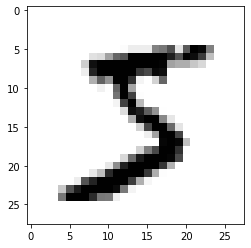

In [13]:
plt.imshow(some_digit_img, cmap='binary')

In [26]:
y[0]

'5'

In [34]:
y = y.astype(np.uint8)
y[0]

5

### 데이터 준비 (훈련데이터, 테스트데이터)

In [35]:
# 7만개의 데이터가 이미 섞여 있으므로
# 앞의 6만개 데이터를 훈련데이터로 사용
# 뒤의 1만개 데이터를 테스트데이터로 사용

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [37]:
(y_test == 2).sum()

1032

In [38]:
for i in range(10):
  print('label 분포 : ', i, (y_train == i).sum())

label 분포 :  0 5923
label 분포 :  1 6742
label 분포 :  2 5958
label 분포 :  3 6131
label 분포 :  4 5842
label 분포 :  5 5421
label 분포 :  6 5918
label 분포 :  7 6265
label 분포 :  8 5851
label 분포 :  9 5949


### 이진분류

In [39]:
60000 - (y_train == 5).sum()

54579

In [45]:
y_train_5 = (y_train == 5).astype(np.uint8) # 5이면1 5가아니면0
y_test_5 = (y_test == 5).astype(np.uint8)

In [47]:
(y_train_5 == 1).sum(), (y_train_5 == 0).sum()

(5421, 54579)

In [64]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [48]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
# sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [65]:
y_train_5 = (y_train == 5).astype(np.uint8) # 5인지 아닌지를 분류: 5이면 1, 5가 아니면 0
y_test_5 = (y_test == 5).astype(np.uint8)

In [63]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, scoring='accuracy', cv=3)

array([0.95035, 0.96035, 0.9604 ])

### 오차행렬

In [130]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

In [71]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [72]:
y_train_pred.shape

(60000,)

In [73]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [74]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [85]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [75]:
y_train_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [76]:
y_train_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [77]:
(y_train_scores > 0).sum()

4217

In [78]:
(y_train_pred == 1).sum()

4217

In [79]:
threshold = 8000 # 임계값
y_train_pred_th8000 = y_train_scores > threshold

In [80]:
confusion_matrix(y_train_5, y_train_pred_th8000)

array([[54470,   109],
       [ 3863,  1558]], dtype=int64)

In [ ]:
array([[53892,   687],
       [ 1891,  3530]])
array([[54470,   109],
       [ 3863,  1558]]) 

In [82]:
precision_score(y_train_5, y_train_pred_th8000)

0.9346130773845231

In [84]:
recall_score(y_train_5, y_train_pred_th8000)

0.2874008485519277

In [86]:
from sklearn.metrics import precision_recall_curve

In [88]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_train_scores)

In [89]:
precisions, recalls, thresholds

(array([0.09040123, 0.09038606, 0.09038757, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 9.99815532e-01, 9.99815532e-01, ...,
        3.68935621e-04, 1.84467810e-04, 0.00000000e+00]),
 array([-106527.45300471, -105763.22240074, -105406.2965229 , ...,
          38871.26391927,   42216.05562787,   49441.43765905]))

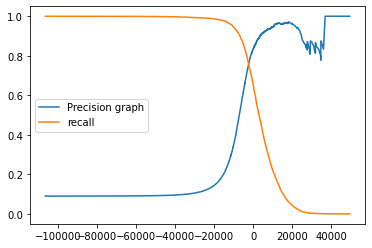

In [94]:
plt.plot(thresholds, precisions[:-1], label='Precision graph')
plt.plot(thresholds, recalls[:-1], label='recall')
plt.legend()

<function matplotlib.pyplot.legend(*args, **kwargs)>

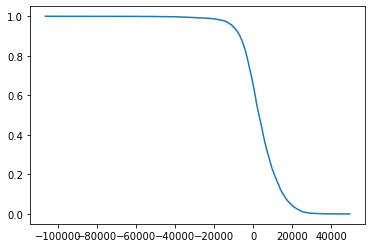

In [95]:
thresholds[np.argmax(precisions >= 0.9)]

3370.0194991439557

In [96]:
thresholds = 3370
y_train_pred_th3370 = y_train_scores > thresholds

In [97]:
precision_score(y_train_5, y_train_pred_th3370)

0.9000345901072293

### ROC 곡선

In [98]:
from sklearn.metrics import roc_curve, plot_roc_curve, roc_auc_score

C:\Users\jwnam\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


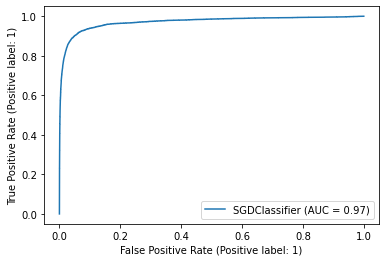

In [99]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_train_scores)

plot_roc_curve(sgd_clf, X_train, y_train_5)

In [100]:
roc_auc_score(y_train_5, y_train_scores) # AUC(면적) Score가 클수록 좋은 모델

0.9604938554008616

- 이진분류에서 ROC_AUC를 성능 측정지표로 많이 사용하지만,
- 불균형한 데이터셋에서는 재현율/정밀도, F1 Score를 보는게 더 바람직

### 다중분류

#### SVM Classifier

In [102]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_scores = cross_val_score(svm_clf, X_train[:1000], y_train[:1000], cv=3)

In [103]:
svm_scores

array([0.89520958, 0.9009009 , 0.88288288])

#### SGD Classifier

In [104]:
sgd_clf = SGDClassifier(random_state=42)
sgd_scores = cross_val_score(sgd_clf, X_train[:1000], y_train[:1000], cv=3)
sgd_scores


array([0.83233533, 0.82882883, 0.79279279])

In [105]:
# 특성 스케일링 적용
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)

In [106]:
sgd_scores = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3)
sgd_scores

array([0.8983, 0.891 , 0.9018])

In [108]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

### 다중 레이블 분류

In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [111]:
y_train_large = (y_train >= 7) # true or false
y_train_odd = (y_train % 2 == 1) # odd or even
y_multilabel = np.c_[y_train_large, y_train_odd]

In [112]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel) # 정답에 7보다크코 홀수인 것들이 들어감

KNeighborsClassifier()

In [ ]:
knn_clf.predict([some_digit])

In [131]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average='macro')

0.976410265560605


### 다중 출력 분류

In [120]:
import random
# for train data
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise

noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

y_train_mod = X_train
y_test_mod = X_test

In [121]:
# 훈련
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

In [123]:
clean_digit = knn_clf.predict([X_test_mod[0]])

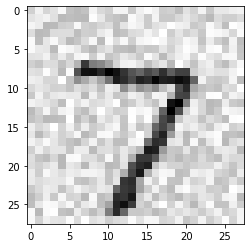

In [124]:
# 시각화
# noise가 들어간 특성 데이터
plt.imshow(X_test_mod[0].reshape(28, 28), cmap='binary')

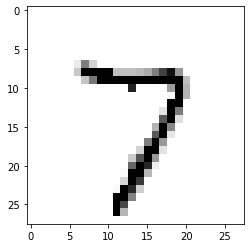

In [125]:
#예측
plt.imshow(clean_digit.reshape(28, 28), cmap='binary')

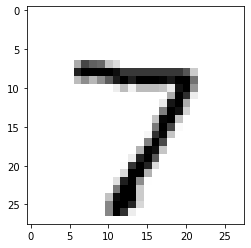

In [127]:
#정답
plt.imshow(y_test_mod[0].reshape(28, 28), cmap='binary')

In [ ]:
# 